# 1D 2 Comp GMM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import corner as corner

In [2]:
%matplotlib notebook

### Data simulation

<IPython.core.display.Javascript object>


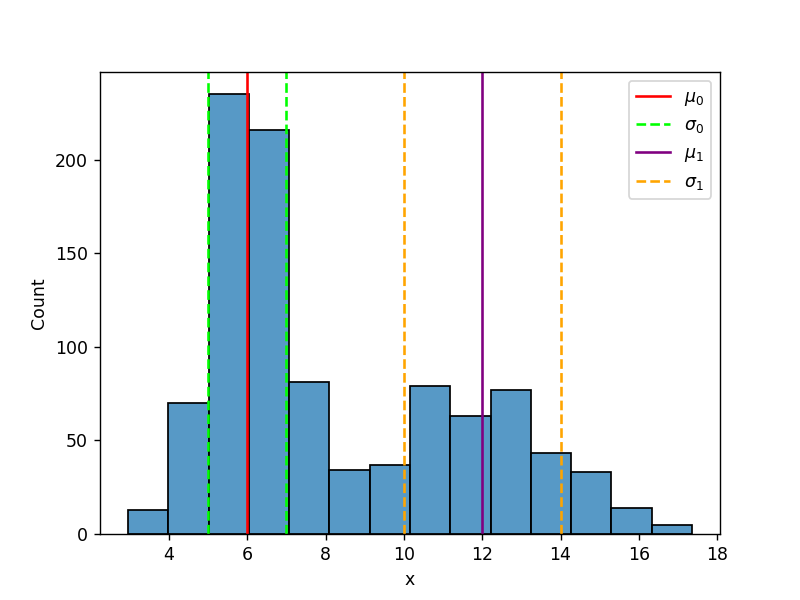

In [9]:
set_seed = False
if set_seed:
    np.random.seed(923114)

N = 1000
μ = [6, 12]
σ = [1, 2]
weight = 0.6

data1 = norm.rvs(size=N, loc=μ[0], scale=σ[0])
data2 = norm.rvs(size=N, loc=μ[1], scale=σ[1])
data = data1
sel = np.where(np.random.rand(N) > weight)
data[sel] = data2[sel]


plt.figure()
ax = sns.histplot(data)
plt.ylabel('Count')
plt.xlabel('x')
ax.axvline(μ[0], color='r', label=r'$μ_0$')
ax.axvline(μ[0]+σ[0], color='lime', linestyle='--', label=r'$σ_0$')
ax.axvline(μ[0]-σ[0], color='lime', linestyle='--')
ax.axvline(μ[1], color='purple', label=r'$μ_1$')
ax.axvline(μ[1]+σ[1], color='orange', linestyle='--', label=r'$σ_1$')
ax.axvline(μ[1]-σ[1], color='orange', linestyle='--')
ax.legend()

In [4]:
def model(x, p):
    #Random bullshittery
    return p

def log_likelihood(p, x, prior_check=1):
    p = model(x, p)
    μ0, μ1, σ0, σ1, weight = p
    log_norm1 = norm.logpdf(x, loc=μ0, scale=σ0) + np.log(1-weight)
    log_norm2 = norm.logpdf(x, loc=μ1, scale=σ1) + np.log(weight)
    log_norm = np.logaddexp(log_norm1, log_norm2)
    total = np.sum(log_norm)*prior_check
    return total

In [5]:
from dynesty import NestedSampler

ndim = 5

def unit_transform(u, centre, span):
    return 2*span*u + centre-span

def prior_transform(u):
    x = np.array(u)
    
    x[0] = unit_transform(x[0], 6, 2)
    x[1] = unit_transform(x[1], 12, 2)
    x[2] = unit_transform(x[2], 1, 1)
    x[3] = unit_transform(x[3], 2, 1)
    return x

sampler = NestedSampler(log_likelihood, prior_transform, ndim, logl_args=[data], nlive=2000)
sampler.run_nested()

z = sampler.results
results = z.samples_equal()

27060it [00:57, 473.22it/s, +2000 | bound: 21 | nc: 1 | ncall: 135494 | eff(%): 21.769 | loglstar:   -inf < -2302.812 <    inf | logz: -2317.337 +/-  0.115 | dlogz:  0.001 >  2.009]


<IPython.core.display.Javascript object>


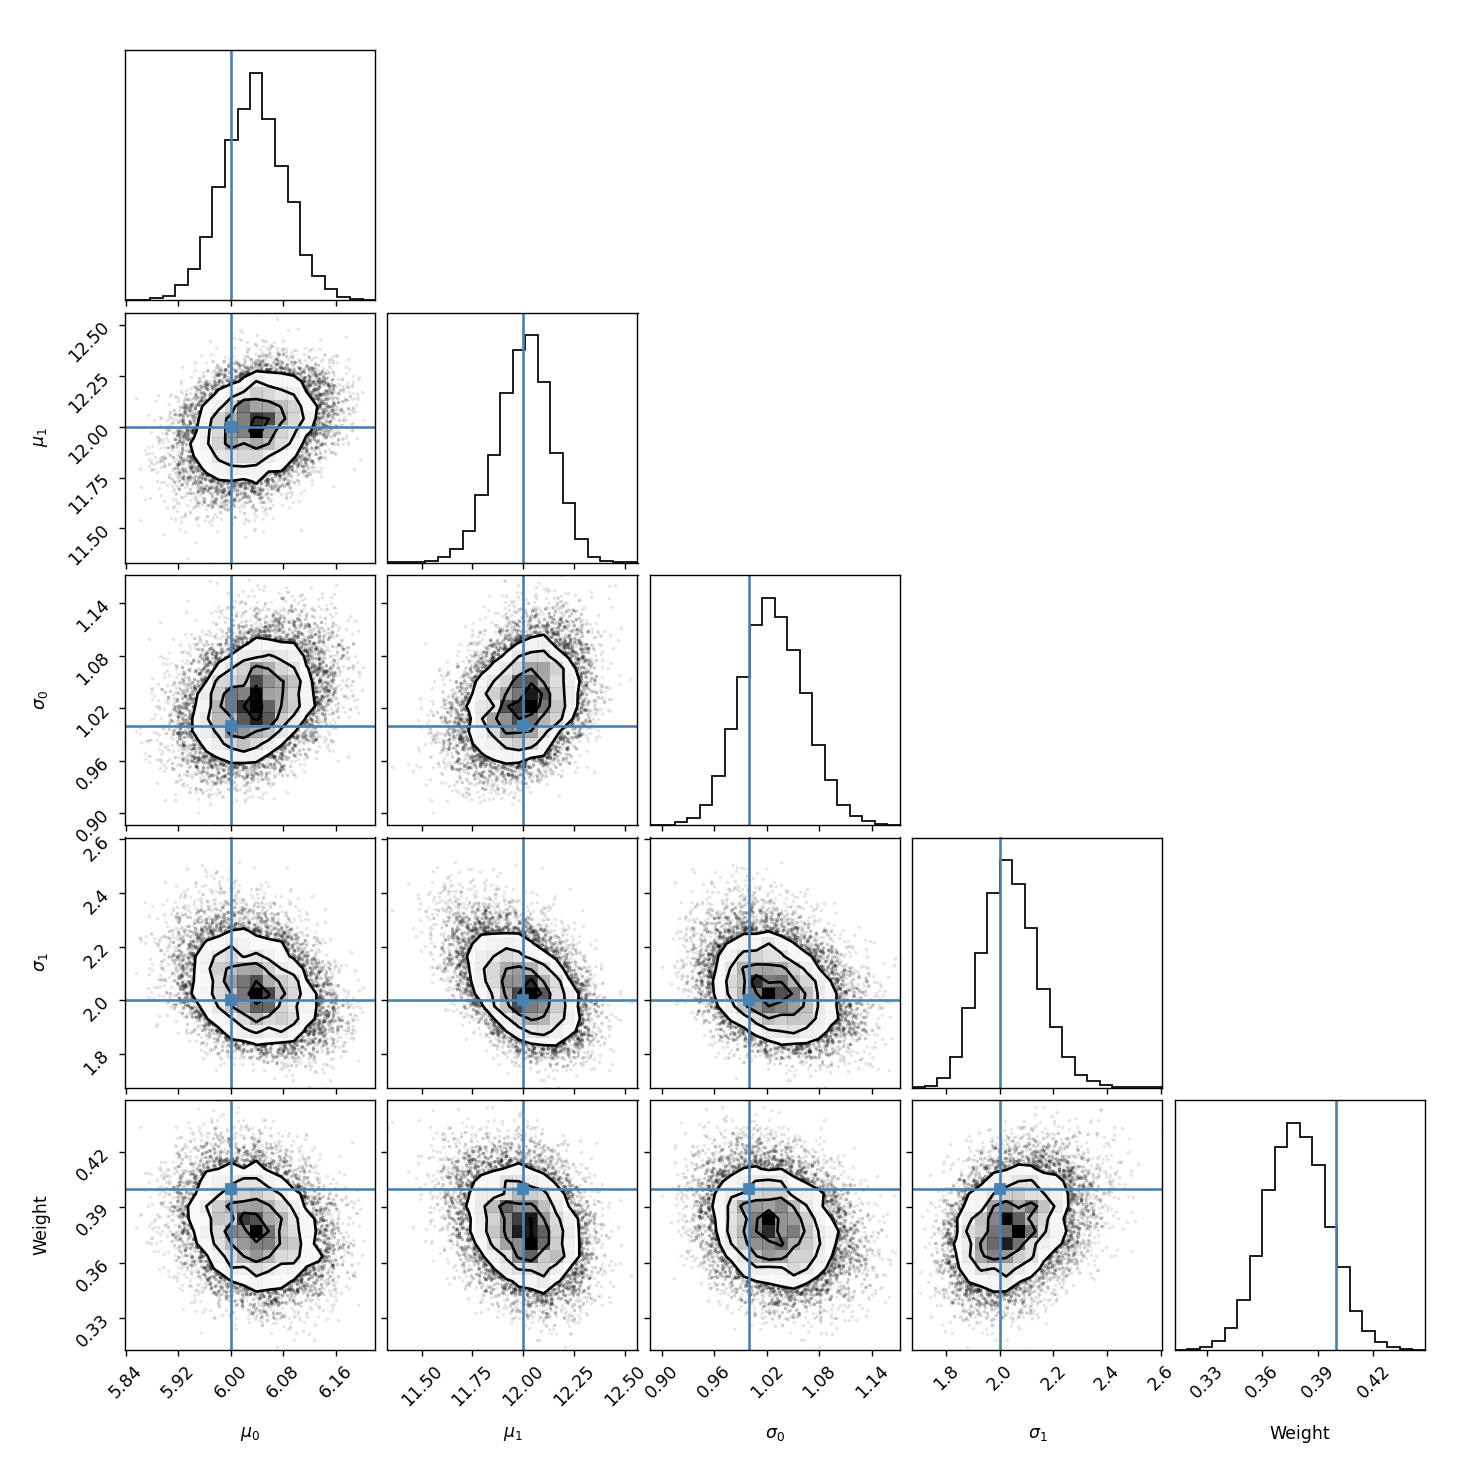

In [8]:
corner.corner(results, labels=[r'$μ_0$', r'$μ_1$', r'$σ_0$', r'$σ_1$', 'Weight'], truths=[μ[0], μ[1], σ[0], σ[1], weight]);